# Home Assignment 1
Due by 8th May, 2024 at 23:59 CEST

## Neural Network Basics

We want to create a 2 layer NN, which means we want to calculate  $y = W_2 * ReLU(W_1 * x + b_1) + b_2$

Complete the TODOs below to create such a NN.

Since you will be needing to compute the gradients w.r.t. all parameters, you may look into online resources for help. Please cite or link any online recources you do use.

You are allowed to change any existing parts, however the code has to remain easy to understand and well documented.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    """
    ReLU activation function
    
    Parameters:
        x (np.ndarray): numpy array with shape (m, n) where m is the number of dimensions and n is the number of points
        
    Returns:
        x' (np.ndarray): return value of the pointwise ReLU application
    """
    return np.maximum(0, x)


def relu_grad(x):
    # TODO: Write a function given a numpy array that calculates the gradient of the ReLU function w.r.t. `x`
    # TODO: Also write the derivation of the gradient in the PDF file In the implementation you may simply use the final derivation.
    # Hint: The function should return a numpy array of the same dimension that `x` has, but only containing 0 or 1
    arr = np.zeros(x.shape)
    return np.greater(x, arr).astype(int)


In [233]:
class NumPyNeuralNet:
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        self.dim_in = dim_in
        self.dim_hidden = dim_hidden
        self.dim_out = dim_out
        
        # TODO: Randomly initialize the weight matrices W_1, W_2 and biases b_1, b_2
        # Hint: use np.random.randn() and make sure to correctly set the dimensions 
        self.W_1 = 0.01 * np.random.randn(self.dim_hidden, self.dim_in)
        self.W_2 = 0.01 * np.random.randn(self.dim_out, self.dim_hidden)
        self.b_1 = np.zeros((self.dim_hidden, 1))
        self.b_2 = np.zeros((self.dim_out, 1))
        
    def linear(self, w, x, b=0):
        return np.matmul(w, x) + b

    def predict(self, x):
        """
        Calculates the output of the neural network for the given x.
        
        Parameters:
            x (np.ndarray): input value numpy array
        
        Returns:
            y (np.ndarray): predicted output for `x`
        """
        # TODO: Calculate output y
        print("shape of x: " + str(x.shape))
        print("this is x: " + str(x))
        print("shape of W_1: " + str(self.W_1.shape))
        print("this is W_1: " + str(self.W_1))
        h_1 = self.linear(self.W_1, x, self.b_1)
        print("this is h_1: " + str(h_1))
        h_1_act = relu(h_1)
        y = self.linear(self.W_2, h_1_act, self.b_2)
        return y
    
    
    def loss(self, x, y):
        """
        Calculates the Mean-Squared Error and returns the gradients w.r.t. to the parameters.
        
        Parameters:
            x (np.ndarray): input value numpy array with shape (self.dim_in, n)
            y (np.ndarray): ground truth value numpy array with shape (self.dim_out, n)
            
        Returns:
            loss (float): Mean-Squared-Error between predicted value on input points and ground truth value
            W_1_grad (np.ndarray): gradient w.r.t W_1   
            W_2_grad (np.ndarray): gradient w.r.t W_2  
            b_1_grad (np.ndarray): gradient w.r.t b_1   
            b_2_grad (np.ndarray): gradient w.r.t b_2   
        """
        # TODO: Calculate the loss (Mean-Squared-Error)
        # Hint: use np.square() and np.mean()
        arr = []
        y_predictions = []
        n = x.shape[1]
        print("this is shape of x in loss: " + str(x.shape))
        fs = x.T
        gts = y.T
        for i in range(n):
            y_predictions.append(self.predict(fs[i].reshape(1,1)))
            arr.append(np.square(y_predictions[i] - gts[i]))
        loss = np.mean(arr)
        # TODO: Calculate all gradients w.r.t to the parameters
        # Hint: You need to calculate the gradients for each of the parameters by hand
        # TODO: Also write the derivation of the gradient in the PDF file. In the implementation you may simply use the final derivation.

        loss_derived = (2/n) * np.sum(np.add(y_predictions, -gts))
        h_1 = self.linear(self.W_1, fs, self.b_1)
        W_1_grad = loss_derived * self.linear(self.W_2, self.linear(relu_grad(h_1), fs))
        print("shape of W_1_grad: " + str(W_1_grad.shape))
        W_2_grad = loss_derived * relu(h_1).T
        b_1_grad = loss_derived * self.linear(self.W_2, relu_grad(h_1))
        b_2_grad = loss_derived

        print("\nSTATISTICS: " + "this is loss: " + str(loss) + "\n these were x and y: "
              + str((x,y)) + " with y_pred as " +str(y_predictions)+ "\n these are W_x_grads and b_x_grads "
              + str((W_1_grad,W_2_grad,b_1_grad,b_2_grad)) + "\n __________________\n END OF STATS")
        
        return loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad
         
    def train(self, x, y, lr=0.001, epochs=1):
        """
        Train the neural network with gradient descent.
        
        Parameters:
            x (np.ndarray): input values
            y (np.ndarray): ground truth values
            lr (float): learning rate, default: 0.001
            epochs (int): number of epochs to train, default: 1000
            
        Returns:
            loss (float): Return the loss achieved after all epochs
        """
        # TODO: Keep track of the loss
        loss_history = []
        data=[]
        for i in range(len(x[0])):
            data.append([x[0][i],y[0][i]])
        
        for i in range(epochs):
            # TODO: Compute loss with x and update parameters of the model using SGD
            np.random.shuffle(data)
            for x_j, y_j in data:
                x_js = np.array([[x_j]])
                y_js = np.array([[y_j]])
                loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad = self.loss(x_js, y_js)
                
                self.W_1 -= lr * W_1_grad
                self.W_2 -= lr * W_2_grad
                self.b_1 -= lr * b_1_grad
                self.b_2 -= lr * b_2_grad
                
                loss_history.append((i,loss))
        
        # TODO: Plot the loss history and return the loss achieved after the final epoch
        # Plot the loss history
        plt.plot(loss_history)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.show()

this is shape of x in loss: (1, 1)
shape of x: (1, 1)
this is x: [[2.46866773]]
shape of W_1: (20, 1)
this is W_1: [[-0.008473  ]
 [-0.00610757]
 [ 0.00427049]
 [-0.01056064]
 [ 0.00698416]
 [ 0.00738138]
 [-0.00991737]
 [ 0.00175583]
 [-0.00495929]
 [ 0.01376594]
 [-0.00296622]
 [-0.0031961 ]
 [ 0.0177736 ]
 [ 0.00545512]
 [ 0.00816053]
 [ 0.01068962]
 [ 0.00147135]
 [ 0.01021723]
 [-0.00659194]
 [ 0.00357663]]
this is h_1: [[-0.02091702]
 [-0.01507755]
 [ 0.01054241]
 [-0.02607071]
 [ 0.01724157]
 [ 0.01822218]
 [-0.02448269]
 [ 0.00433456]
 [-0.01224284]
 [ 0.03398353]
 [-0.0073226 ]
 [-0.00789012]
 [ 0.0438771 ]
 [ 0.01346688]
 [ 0.02014565]
 [ 0.02638911]
 [ 0.00363227]
 [ 0.02522295]
 [-0.01627331]
 [ 0.00882951]]
shape of W_1_grad: (1, 1)

STATISTICS: this is loss: 37.140510622293384
 these were x and y: (array([[2.46866773]]), array([[6.09432034]])) with y_pred as [array([[1.88550828e-05]])]
 these are W_x_grads and b_x_grads (array([[-0.66682936]]), array([[-0.        , -0.   

C:\Users\cHlav\AppData\Local\Temp\ipykernel_10408\3869998436.py:65: RuntimeWarning: overflow encountered in square
  arr.append(np.square(y_predictions[i] - gts[i]))
C:\Users\cHlav\AppData\Local\Temp\ipykernel_10408\3869998436.py:16: RuntimeWarning: overflow encountered in matmul
  return np.matmul(w, x) + b
C:\Users\cHlav\AppData\Local\Temp\ipykernel_10408\3869998436.py:16: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(w, x) + b


shape of W_1_grad: (1, 1)

STATISTICS: this is loss: nan
 these were x and y: (array([[7.30005321]]), array([[53.29077691]])) with y_pred as [array([[nan]])]
 these are W_x_grads and b_x_grads (array([[nan]]), array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]]), array([[nan]]), nan)
 __________________
 END OF STATS
this is shape of x in loss: (1, 1)
shape of x: (1, 1)
this is x: [[-13.20359999]]
shape of W_1: (20, 1)
this is W_1: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
this is h_1: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
shape of W_1_grad: (1, 1)

STATISTICS: this is loss: nan
 these were x and y: (array([[-13.20359999]]), array([[174.33505269]])) with y_pred as [array([[nan]])]
 these are W_x_grads and b_x_grads (array([

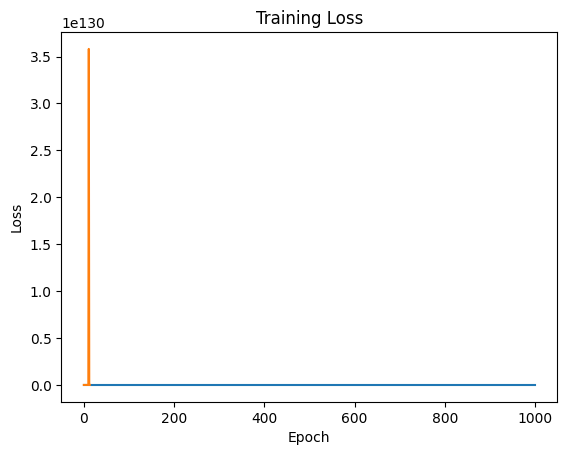

None


In [234]:
# We test the model created above on the simple function y = x^2

model = NumPyNeuralNet(1, 20, 1)

# Create a randomly distributed array of 1000 values
x_train = 10 * np.random.randn(1, 1000)
# Create ground truth by calculating x*x
y_train = x_train * x_train

loss = model.train(x_train, y_train)
print(loss)

## Embeddings

### Intrinsic evaluation of embeddings
Word similarity task is often used as an intrinsic evaluation criteria. In the dataset file you will find a list of word pairs with their similarity scores as judged by humans. The task would be to judge how well are the word vectors aligned to human judgement. We will use word2vec embedding vectors trained on the google news corpus. (Ignore the pairs where at least one the words is absent in the corpus)

In [ ]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

Write a function which takes as input two words and computes the cosine similarity between them.
You do not need to implement the cosine similarity calculation from scratch. Feel free to use any Python library.
Remeber to ignore any pairs where at least one word is absent in the corpus. (2 points)

In [ ]:
def similarity(word1, word2):
    pass

Compute the similarity between all the word pairs in the list and sort them based on the similarity scores. (1 point)

Sort the word pairs in the list based on the human judgement scores. (1 point)

Compute spearman rank correlation between the two ranked lists obtained in the previous two steps.
You do not need to implement the spearman rank correlation calculation from scratch. Feel free to use any Python library. (2 points)

### Word embedding based clasifier
We will design a simple sentiment classifier based on the pre-trained word embeddings (google news).

Each data point is a movie review and the sentiment could be either positive (1) or negative (0)

In [ ]:
import pickle
with open('sentiment_test_X.p', 'rb') as fs:
    test_X = pickle.load(fs)

len(test_X)

In [ ]:
test_X[0]

In [ ]:
with open('sentiment_test_y.p', 'rb') as fs:
    test_y = pickle.load(fs)
    
len(test_y)

In [ ]:
test_y[0]

In [ ]:
with open('sentiment_train_X.p', 'rb') as fs:
    train_X = pickle.load(fs)
with open('sentiment_train_y.p', 'rb') as fs:
    train_y = pickle.load(fs)
with open('sentiment_val_X.p', 'rb') as fs:
    val_X = pickle.load(fs)
with open('sentiment_val_y.p', 'rb') as fs:
    val_y = pickle.load(fs)        

Given a review, compute its embedding by averaging over the embedding of its constituent words. Define a function which given a review as a list of words, generates its embeddings by averaging over the constituent word embeddings. (4 points)

In [ ]:
def generate_embedding(review):
    # return embedding
    pass

Create a feed-forward network class with pytorch. (Hyperparamter choice such as number of layers, hidden size is left to you) (8 points)

In [ ]:
class Classifier(nn.Module):
    pass

Create a Dataset class for efficiently enumerating over the dataset. (3 points)

In [ ]:
class sent_data(Dataset):
    def __init__(self):
        pass
    
    def __len__(self):
        pass
    
    def __getitem__(self):
        pass

Write a train function to train model. At the end of each epoch compute the validation accuracy and save the model with the best validation accuracy. (12 points)

In [ ]:
# Adopt your code to incorporate mini-batch training
# Use cross-entropy as your loss function
def train(model, train_data, val_data, epochs=5, learning_rate=0.001):
    # write your code snippet here
    
    pass

Evaluate the trained model on the test set and report the test accuracy. (3 points)

In [ ]:
def evaluate(model, test_data):
    pass